<AxesSubplot:>

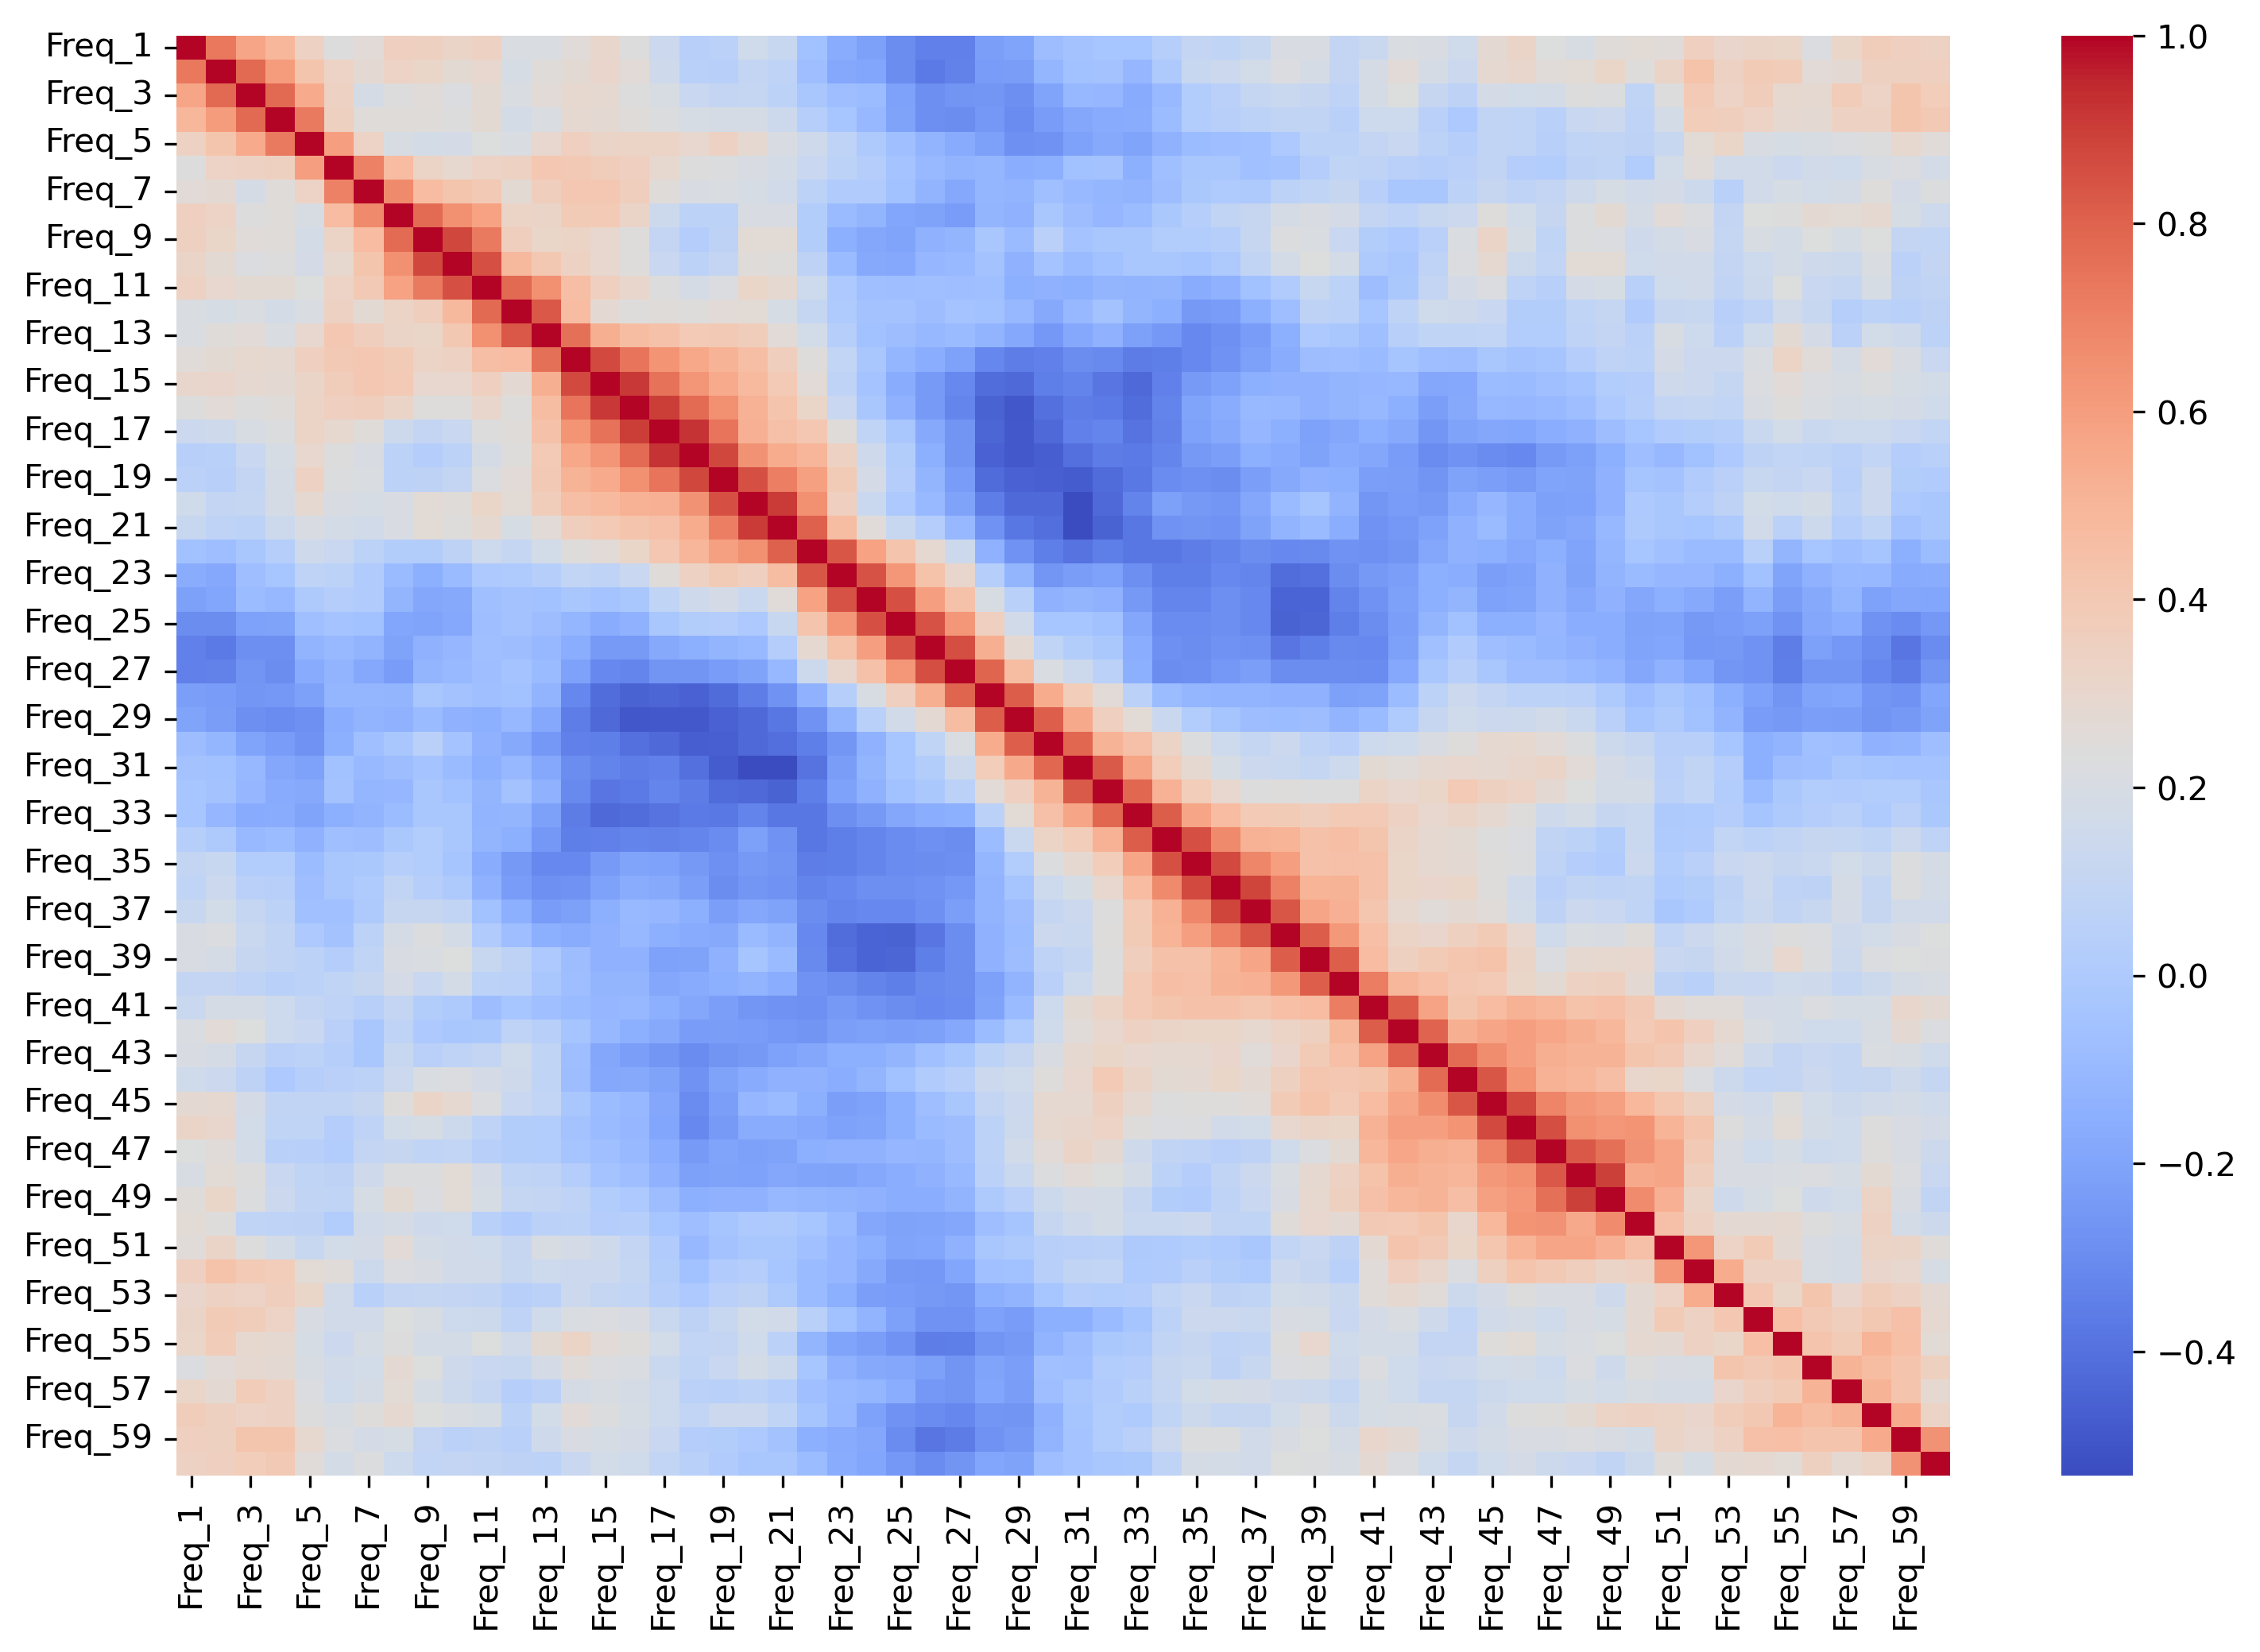

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sonar.all-data.csv')

plt.figure(figsize=(12,8),dpi=300)
sns.heatmap(df.corr(),cmap='coolwarm')

In [18]:
df['Target'] = df['Label'].map({'R':0,'M':1})
np.abs(df.corr()['Target']).sort_values().tail(5)

Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x = df.drop(['Target','Label'],axis=1)
y = df['Label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]

from sklearn.pipeline import Pipeline

pipe = Pipeline(operations)

from sklearn.model_selection import GridSearchCV

k_values = list(range(1,30))
param_grid = {'knn__n_neighbors':k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(x_train,y_train)

full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

<AxesSubplot:>

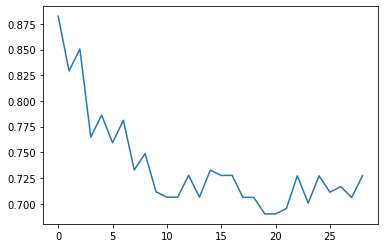

In [30]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

In [32]:
y_pred = full_cv_classifier.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[9, 2],
       [1, 9]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.90      0.82      0.86        11
           R       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21

